# Desafio Inferência Estatística

## Depressão e Hábitos Saudáveis

O transtorno depressivo representa um grande problema de saúde pública e é apontado como uma das principais causas de doenças e debilitações segundo a Organização Mundial da Saúde (OMS). A depressão resulta de uma interação complexa de fatores sociais, psicológicos e biológicos e, embora o acesso a diagnósticos e tratamentos esteja aumentando, muitos ainda não possuem acesso ao controle adequado dos sintomas depressivos.

Para garantir um estilo de vida saudável, a OMS recomenda a prática regular de exercícios, bem como a adoção de uma dieta saudável rica em alimentos in natura e com reduzido teor de gordura saturada, sal e açúcares refinados.

Neste desafio, utilizaremos dados de uma pesquisa realizada anualmente nos Estados Unidos para avaliar **(1)** qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006, e **(2)** se hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população.

## National Health and Nutrition Examination Survey

O National Health and Nutrition Examination Survey (NHANES) é uma pesquisa anual conduzida pelo National Center for Health Statistics (NCHS) do Centro de Controle e Prevenção de Doenças (Centers for Disease Control - CDC) para avaliar a saúde e nutrição de adultos e crianças dos Estados Unidos. Dados coletados incluem questões demográficas, socioeconômicas, dietéticas e relacionadas à saúde, com o componente de exame contendo medidas médicas, odontológicas, fisiológicas e exames laboratoriais.

A pesquisa examina uma amostra de cerca de 5.000 pessoas a cada ano, selecionada à partir de amostragem complexa a fim de selecionar uma amostra representativa da população civil não institucionalizada dos EUA. Sendo assim, as análises utilizando este estudo devem ser realizadas utilizando técnicas e ferramentas que levem em conta a amostragem complexa.

Neste desafio, no entanto, iremos assumir que os dados foram obtidos usando uma amostra aleatória da população de interesse e utilizaremos técnicas e ferramentas de análise usuais para amostras aleatórias para fins didáticos.

## Patient Health Questionnaire-9 (PHQ-9)

O Patient Health Questionnaire-9 (PHQ-9) é um instrumento utilizado para avaliar o grau de depressão em pacientes. O questionário consiste de 9 itens em que os respondentes indicam a frequência (0 = “nenhuma vez”, 1 = “menos de uma semana”, 2 = “uma semana ou mais” e 3 = “quase todos os dias”) de sintomas de depressão nas duas últimas semanas.

O PHQ-9 inclui os seguintes itens para a pergunta “Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir?” (0 = “nenhuma vez”, 1 = “menos de uma semana”, 2 = “uma semana ou mais” e 3 = “quase todos os dias”):

1 - Pouco interesse ou pouco prazer em fazer as coisas

2 - Se sentiu para baixo, deprimido(a) ou sem perspectiva

3 - Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume

4 - Se sentiu cansado(a) ou com pouca energia

5 - Falta de apetite ou comeu demais

6 - Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)

7 - Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)

8 - Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume

9 - Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)

O escore total é calculado à partir da soma dos itens 1-9 e varia de 0 a 27, em que maiores valores do escore indicam maiores frequências de sintomas de depressão. Aqueles com pontuação maior ou igual a 5 para o escore total de PHQ-9 são considerados como tendo sintomas leves (5-9), moderados (10-14), moderadamente severos (15-19) e severos de depressão (>= 20).

## Healthy Eating Index - (HEI)

O Healthy Eating Index (HEI) é uma medida de qualidade da dieta baseado nas orientações dietéticas do governo federal americano (Dietary Guidelines for Americans). O HEI utiliza diferentes grupos alimentares para o cálculo do escore, variando de 0 a 100, em que maiores valores do escore refletem dietas mais próximas das orientações alimentares em vigor.

O índice é composto por 13 componentes baseados nos grupos alimentares descritos nas recomendações dietéticas. Detalhes dos valores máximos e interpretações estão descritos no quadro abaixo:



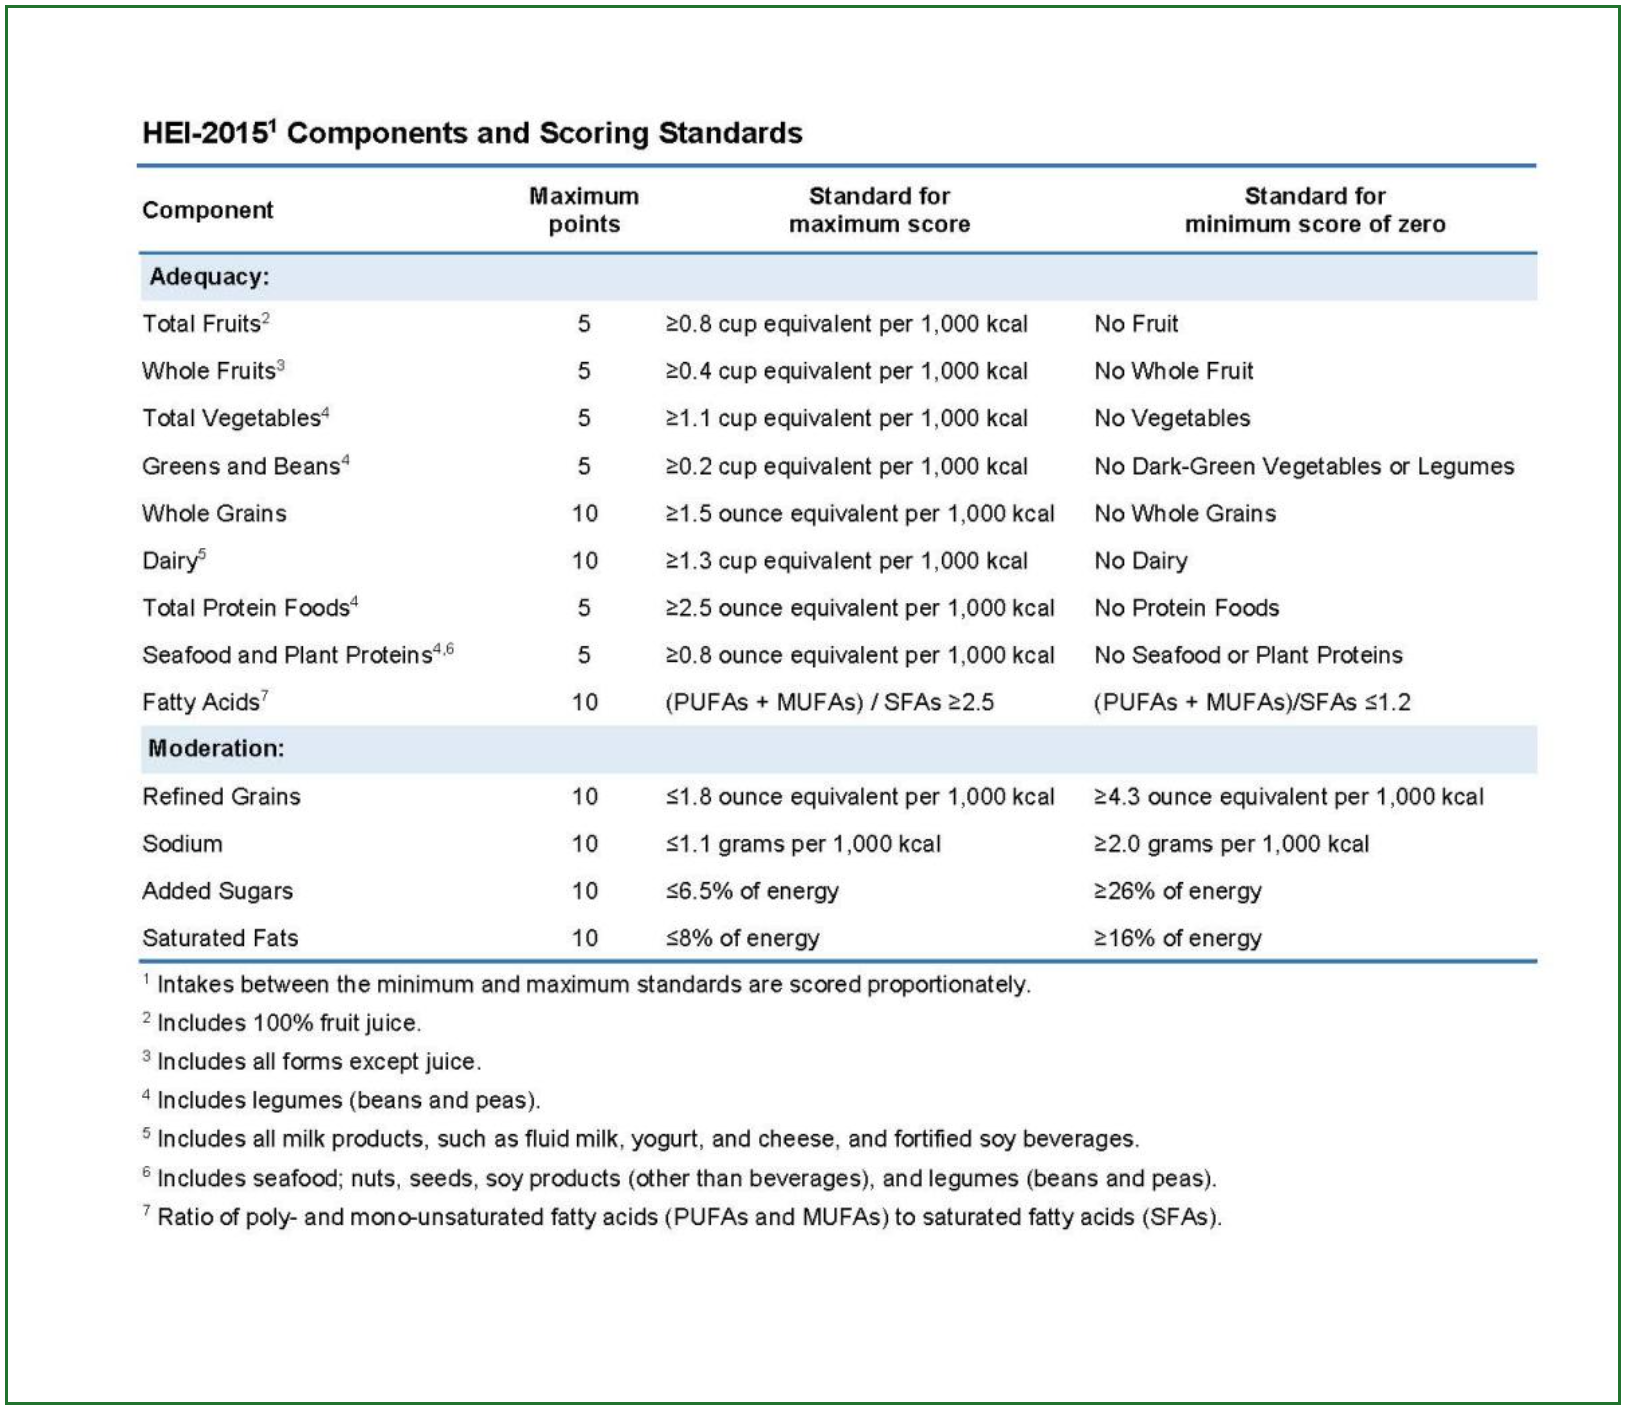

## Physical Activity Guidelines for Americans (PAGA)

O Physical Activity Guidelines for Americans (PAG) é emitido pelo Departamento de Saúde e Serviços Humanos (U.S. Department of Health and Human Services (HHS)) e possui recomendações de atividades físicas. Este documento é utilizado em conjunto com as orientações dietéticas para americanos (Dietary Guidelines for Americans) para promover a importância de ser fisicamente ativo e seguir uma dieta saudável.

O PAGA recomenda que adultos se engajem em pelo menos 150 minutos de atividades aeróbicas de intensidade moderada ou 75 minutos de atividades aeróbicas de intensidade vigorosa semanalmente. A partir dos dados coletados do NHANES, é possível calcular o número de minutos de atividades físicas, definido como a total minutos semannais de atividades físicas moderadas + 2*(total minutos de atividades aeróbicas vigorosas).

###  Base de dados

DEMO_PHQ.csv: banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006, segue PDF com detalhamento das variáveis.

PAG_HEI.csv: banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006, segue PDF com detalhamento das variáveis.

In [1]:
# Importando pacotes para a análise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Importando dados
demo = pd.read_csv('DEMO_PHQ.csv')
pag = pd.read_csv('PAG_HEI.csv')

### Tratamento de dados

In [3]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [4]:
pag.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [5]:
demo.head() 

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [6]:
pag.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


Combine os dois bancos de dados fornecidos, utilizando a variável SEQN como chave única. O banco de dados final deve conter 5334 observações dos adultos respondentes do NHANES.

In [7]:
bd = demo.merge(pag, on = 'SEQN', how = 'left') 
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

#### Tratamento das variáveis

In [8]:
#Verificando missing values
bd.isnull().mean().round(4)*100 

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

In [9]:
# Medidas resumo das variáveis quantitativas:
bd.drop(columns=['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2) 

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,...,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,...,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,...,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,...,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Avaliando frequências das variáveis qualitativas:

In [10]:
# Distribuição dos escores para PHQ9
bd[[
"DPQ010",
"DPQ020",
"DPQ030",
"DPQ040",
"DPQ050",
"DPQ060",
"DPQ070",
"DPQ080",
"DPQ090"]].agg(['value_counts']) 
# Resultado: boa parte das pessoas está no 0.0, que significa que não tem sintomas

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


In [11]:
# Distribuição de raça:
bd[["RIDRETH1"]].value_counts(sort = False) 

# RIDRETH1 com códigos errados no desafio
# 1	Mexican American	
# 2	Other Hispanic
# 3	Non-Hispanic White	
# 4	Non-Hispanic Black	
# 5	Other Race - Including Multi-Racial

RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64

In [12]:
# Distribuição de escolaridade:
bd[["DMDEDUC"]].value_counts(sort = False)
# 1 = Menor que 9o ano
# 2 = 9-12o ano
# 3 = Ensino médio
# 4 = Ensino superior incompleto
# 5 = Superior completo ou maior
# 7 = Se recusou a responder
# 9 = Não sabe

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

In [13]:
# Distribuição de renda:
bd[["INDFMINC"]].value_counts(sort = False)
# 1 = 0-4999
# 2 - 5000-9999
# 3 = 10000-14999
# 4 = 15000-19999
# 5 = 20000-24999
# 6 = 25000-34999
# 7 = 35000-44999
# 8 = 45000-54999
# 9 = 55000-64999
# 10 = 65000-74999
# 11 = Maior ou igual a 75000
# 12 = Maior que 20000
# 13 = Menor que 20000
# 77 = Se recusou a responder
# 99 = Não sabe

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

In [14]:
# Distribuição de grupo de aderência:
bd[["ADHERENCE"]].value_counts(sort = False)

# 1 = Baixo (< 150 min/semana)
# 2 = Adequado (150-300 min/semana)
# 3 = Acima (> 300 min/semana)

# Resultado: ou a pessoa faz muito exercício, ou não faz nada

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

In [15]:
# Agrupando/recategorizando variáveis qualitativas:

# 1) Substituindo as categorias 7 e 9 por missing para as variáveis DPQ0X0 e DMDEDUC (porque tem poucos valores)

# 2) Agrupando as categorias 2 e 5 na variável RIDRETH1 (por questões de classificação de raça)

# 3) Recategorizando a variável INDFMINC (renda) com o ponto médio de cada categoria por conter muitas categorias nesta variável. 
# Iremos prosseguir a análise desta variável como uma variável quantitativa (para todos que tem 1, vai recategorizar
# com o valor médio entre 0 e 4999)

replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "RIDRETH1": {5: 2}, # Other
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "INDFMINC": {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

bd2 = bd.replace(replace_map)

Crie a variável phq9 - escore Patient Health Questionnaire-9 como a soma das variáveis DPQ010 a DPQ090

In [16]:
bd2["phq9"] = bd2[["DPQ010", 
                   "DPQ020", 
                   "DPQ030", 
                   "DPQ040", 
                   "DPQ050", 
                   "DPQ060", 
                   "DPQ070", 
                   "DPQ080", 
                   "DPQ090"]].sum(axis = 'columns', skipna = False) 

bd2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090",
     "phq9"]].head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,phq9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0


Crie a variável phq_grp - grupo de sintomas de depressão que assume 0 (“sem sintomas”) se phq9 < 5, 1 (“sintomas leves”) se 5 <= phq9 < 10, 2 (“sintomas moderados”) se 10 <= phq9 < 15, 3 (“sintomas moderadamente severos”) se 15 <= phq9 < 19 e 4 (“sintomas severos”) se phq9 >= 20

In [17]:
conditions = [
  (bd2['phq9'].isna()),
  (bd2['phq9'] <= 5), 
  (bd2['phq9'] > 5) & (bd2['phq9'] <= 9),
  (bd2['phq9'] > 9) & (bd2['phq9'] <= 14),
  (bd2['phq9'] > 14) & (bd2['phq9'] <= 19),
  (bd2['phq9'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

bd2["phq_grp"] = np.select(conditions, values) 

bd2[["phq_grp"]].value_counts(sort = False) 

phq_grp
0.0        4013
1.0         489
2.0         201
3.0          73
4.0          23
dtype: int64

### EDA: Análise Univariada

In [33]:
# Como o percentual de missing está abaixo de 10% para todas as variáveis, seguiremos a análise utilizando apenas os dados 
# completos (dropna)
# Criando vetores de variáveis quantitativas
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

# Criando vetores de variáveis quanlitativas
var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

# Para saber o que cada número significa
label_quali = {
  "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 2: 'Outro', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio", 4: "Superior \n incompleto", 5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
  "phq_grp": {0: "Sem sintomas", 1: "Sintomas \n leves", 2: "Sintomas \n moderados",  3:"Sintomas \n moderadamente severos", 4: "Sintomas \n severos" }
}

In [34]:
bd2[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,4799.00
mean,45.09,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.73
std,20.15,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.73
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,27.00,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,43.00,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,62.00,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,4.00
95%,81.00,75000.00,1863.05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,85.00,75000.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,85.00,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


In [ ]:
# Dado que uma semana tem no máximo 168 horas (10080 minutos) o valor máximo de PAG_MINW não parece ser um valor possível. 
# Nesse caso, iremos truncar o valor de PAG_MINW em 3600 minutos (60h semanais).

In [35]:
bd2['PAG_MINW_trunc'] = np.where(bd2['PAG_MINW'] > 3600, 3600, bd2['PAG_MINW']) 
bd2[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.25, .5, .75, .95, .99]).round(2) 

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
95%,1863.05,1863.05
99%,3672.06,3600.00
max,10777.83,3600.00


In [36]:
# Transformar a variável PAG_MINW em horas para facilitar a interpretação
bd2["PAG_HRW"] = bd2["PAG_MINW_trunc"]/60

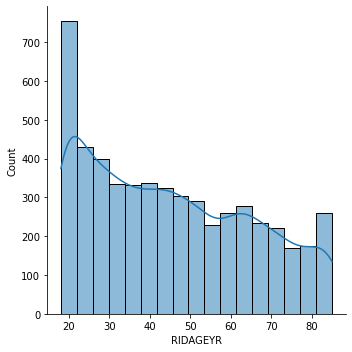

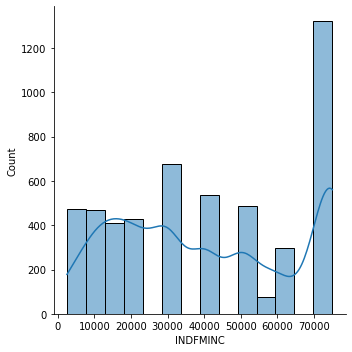

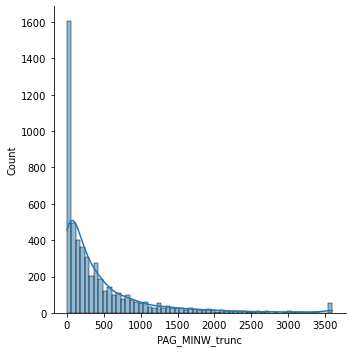

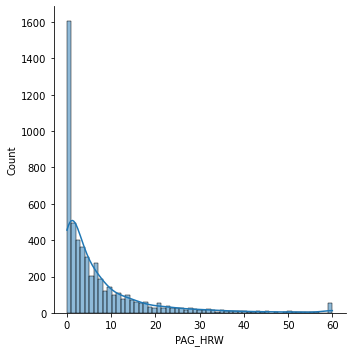

In [23]:
#Histograma das variáveis contínuas/quantitativas
sns.displot(bd2, x="RIDAGEYR", kde=True) #idade é bem distribuida, apesar de ter pessoas mais jovens (20 anos)
sns.displot(bd2, x="INDFMINC", kde=True) #renda
sns.displot(bd2, x="PAG_MINW_trunc", kde=True) #exercício físico truncado
sns.displot(bd2, x="PAG_HRW", kde=True) #exercício físico hora. Boa parte das pessoas não faz exercício nenhum, tem pico no 0
plt.show()

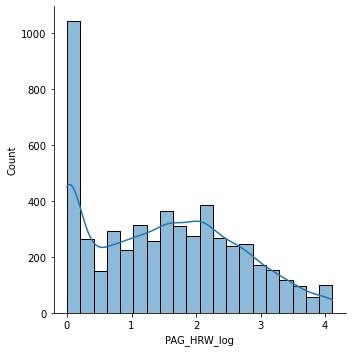

In [24]:
# A variável PAG_HRW é bastante assimétrica, por isso criar uma versão com o log (diminui as diferenças entre eles)
# Isso foi feito também porque no teste de hipóteses, uma hipótese é os dados normais
bd2["PAG_HRW_log"] = np.log(bd2["PAG_HRW"] + 1)
sns.displot(bd2, x="PAG_HRW_log", kde=True)
plt.show()

In [25]:
# Função para construir gráfico de barras (para variáveis qualitativas)

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

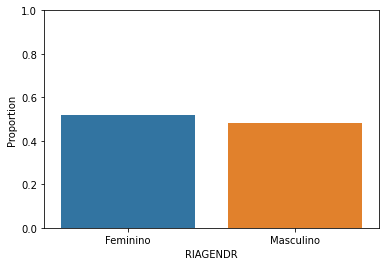

In [26]:
grafico_barras_prop(bd2.replace(label_quali), variable = "RIAGENDR")

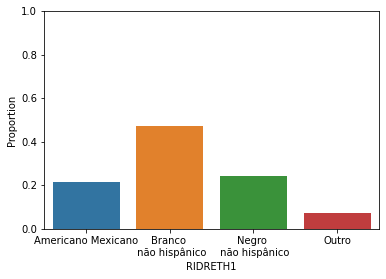

In [27]:
grafico_barras_prop(bd2.replace(label_quali), 
                    variable = "RIDRETH1")

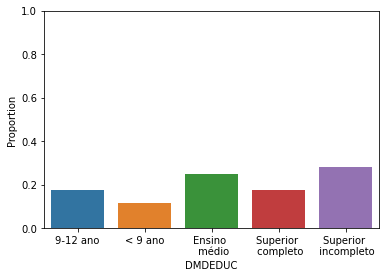

In [28]:
grafico_barras_prop(bd2.replace(label_quali), 
                    variable = "DMDEDUC")

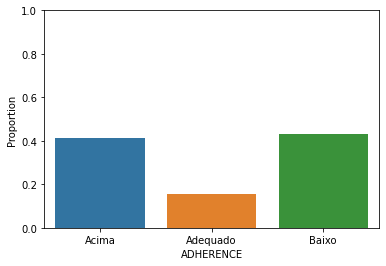

In [29]:
grafico_barras_prop(bd2.replace(label_quali), 
                    variable = "ADHERENCE")

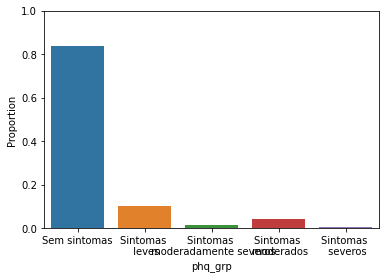

In [37]:
grafico_barras_prop(bd2.replace(label_quali), 
                    variable = "phq_grp")

### EDA: Análise Bivariada e Testes de Hipóteses

In [31]:
# Função para construir boxplot para uma variável quantitativa versus grupo de depressão

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

A) Perfil com maiores incidências de sintomas de depressão

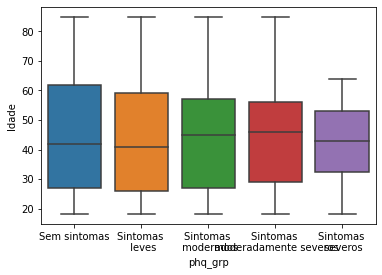

In [38]:
# Idade
grafico_boxplot_grp(bd2.replace(label_quali), "RIDAGEYR", "Idade")
# De acordo com a mediana, sem sintomas e sintomas leves não parecem ter muita diferença, mas outros um pouco

In [42]:
# Teste de hipóteses para ver se tem diferença na média de idade para sintomas de depressão

from scipy.stats import f_oneway 

bd_aux = bd2[["phq_grp", "RIDAGEYR"]].dropna() 

stat, p = f_oneway(bd_aux[(bd_aux.phq_grp == 0)]["RIDAGEYR"],
                   bd_aux[(bd_aux.phq_grp == 1)]["RIDAGEYR"],
                   bd_aux[(bd_aux.phq_grp == 2)]["RIDAGEYR"],
                   bd_aux[(bd_aux.phq_grp == 3)]["RIDAGEYR"],
                   bd_aux[(bd_aux.phq_grp == 4)]["RIDAGEYR"])

print('stat=%.3f, p=%.3f' % (stat, p))


stat=0.558, p=0.693


In [ ]:
# Hipótese nula = não tem diferença entre grupos
# Hipótese alternativa: tem diferença entre pelo menos um grupo
# Aceita hipótese nula, Não foi identificado diferença na média de idade dos grupos com depressão

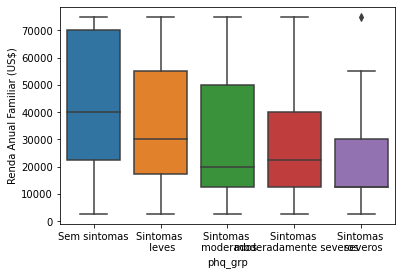

In [43]:
# Renda
grafico_boxplot_grp(bd2.replace(label_quali), "INDFMINC", "Renda Anual Familiar (US$)")
# Parece que renda diminui conforme os sintomas ficam mais severos

In [47]:
#Teste de hipóteses

from scipy.stats import f_oneway

bd_aux = bd2[["phq_grp", "INDFMINC"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.phq_grp == 0)]["INDFMINC"],
                   bd_aux[(bd_aux.phq_grp == 1)]["INDFMINC"],
                   bd_aux[(bd_aux.phq_grp == 2)]["INDFMINC"],
                   bd_aux[(bd_aux.phq_grp == 3)]["INDFMINC"],
                   bd_aux[(bd_aux.phq_grp == 4)]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.868, p=0.000


In [ ]:
# Valor p bem baixo, logo, tem diferença
# H0: Não tem diferença na média de renda conforme os níveis de sintomas
# Rejeita hipótese nula, pois tem diferença

In [48]:
# Como foi visto que tem diferença, é feito teste Tukey para saber em quais grupos ela está

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(bd_aux['INDFMINC'], #variável quantitativa
                  bd_aux['phq_grp'], #grupo
                  alpha = 0.05) #nível de significância

print(tukey)
# Nas opções 'False' não há diferença

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
   0.0    1.0  -5537.0284  0.001  -8759.6683 -2314.3885   True
   0.0    2.0 -12328.1821  0.001 -17118.7904 -7537.5738   True
   0.0    3.0 -14625.6659  0.001 -22501.5045 -6749.8273   True
   0.0    4.0 -20914.0609  0.001 -34975.6407 -6852.4811   True
   1.0    2.0  -6791.1537  0.008 -12370.5806 -1211.7268   True
   1.0    3.0  -9088.6375 0.0257 -17467.7132  -709.5617   True
   1.0    4.0 -15377.0325 0.0286 -29726.5309 -1027.5341   True
   2.0    3.0  -2297.4838    0.9 -11395.4743  6800.5067  False
   2.0    4.0  -8585.8788 0.5058 -23366.6982  6194.9407  False
   3.0    4.0   -6288.395 0.7985 -22336.8071   9760.017  False
--------------------------------------------------------------


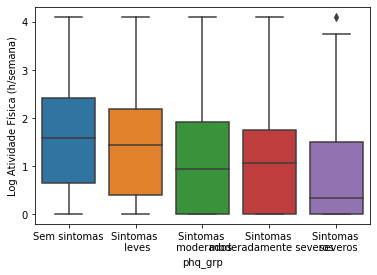

In [49]:
# Atividade física
grafico_boxplot_grp(bd2.replace(label_quali), "PAG_HRW_log", "Log Atividade Física (h/semana)")

In [50]:
from scipy.stats import f_oneway

bd_aux = bd2[["phq_grp", "PAG_HRW_log"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.phq_grp == 0)]["PAG_HRW_log"],
                   bd_aux[(bd_aux.phq_grp == 1)]["PAG_HRW_log"],
                   bd_aux[(bd_aux.phq_grp == 2)]["PAG_HRW_log"],
                   bd_aux[(bd_aux.phq_grp == 3)]["PAG_HRW_log"],
                   bd_aux[(bd_aux.phq_grp == 4)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=15.673, p=0.000


In [ ]:
# Tem diferença, rejeita hipótese nula.

In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(bd_aux['PAG_HRW_log'],
                  bd_aux['phq_grp'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1483 0.0451 -0.2945  -0.002   True
   0.0    2.0  -0.4958  0.001 -0.7165 -0.2751   True
   0.0    3.0  -0.5161  0.001 -0.8767 -0.1554   True
   0.0    4.0  -0.6398 0.0493 -1.2783 -0.0012   True
   1.0    2.0  -0.3475  0.002 -0.6034 -0.0916   True
   1.0    3.0  -0.3678 0.0672 -0.7509  0.0154  False
   1.0    4.0  -0.4915 0.2384  -1.143    0.16  False
   2.0    3.0  -0.0203    0.9 -0.4376   0.397  False
   2.0    4.0   -0.144    0.9 -0.8162  0.5282  False
   3.0    4.0  -0.1237    0.9 -0.8539  0.6065  False
----------------------------------------------------


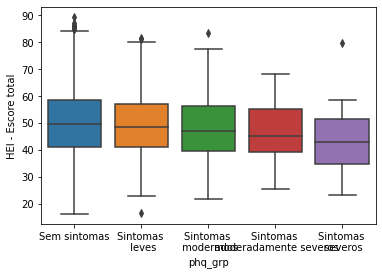

In [52]:
# Alimentação
grafico_boxplot_grp(bd2.replace(label_quali), "HEI2015_TOTAL_SCORE", "HEI - Escore total")

In [53]:
from scipy.stats import f_oneway

bd_aux = bd2[["phq_grp", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.phq_grp == 0)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.phq_grp == 1)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.phq_grp == 2)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.phq_grp == 3)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.phq_grp == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.231, p=0.002


In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(bd_aux['HEI2015_TOTAL_SCORE'],
                  bd_aux['phq_grp'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.3467  -2.7413  0.528  False
   0.0    2.0  -1.8512 0.2456  -4.3239 0.6216  False
   0.0    3.0  -3.5486 0.1142  -7.5748 0.4776  False
   0.0    4.0  -5.7943 0.1623 -12.8258 1.2372  False
   1.0    2.0  -0.7446    0.9  -3.6104 2.1212  False
   1.0    3.0   -2.442 0.5216  -6.7209 1.8369  False
   1.0    4.0  -4.6876 0.3855 -11.8668 2.4915  False
   2.0    3.0  -1.6974 0.8417  -6.3613 2.9664  False
   2.0    4.0  -3.9431 0.5819 -11.3581  3.472  False
   3.0    4.0  -2.2456    0.9 -10.3128 5.8215  False
----------------------------------------------------


B) Perfil de hábitos saudáveis

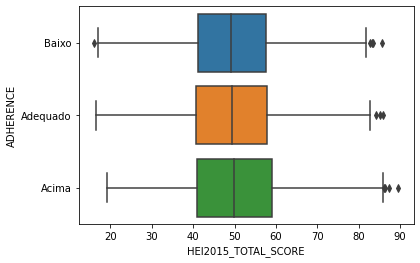

In [57]:
# Alimentação saudável x Exercícios Físicos
sns.boxplot(y="ADHERENCE", 
            x="HEI2015_TOTAL_SCORE", 
            orient="h",
            data=bd2.replace(label_quali))
plt.show()

In [59]:
from scipy.stats import f_oneway

bd_aux = bd2[["ADHERENCE", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.ADHERENCE == 1)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.ADHERENCE == 2)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.ADHERENCE == 3)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.122, p=0.016


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(bd_aux['HEI2015_TOTAL_SCORE'],
                  bd_aux['ADHERENCE'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.3937 0.7031  -0.805 1.5924  False
   1.0    3.0   1.0773  0.012  0.1931 1.9616   True
   2.0    3.0   0.6837  0.378 -0.5186 1.8859  False
---------------------------------------------------


In [ ]:
# Existe diferença apenas entre os grupos 1(muito pouco ou nada) e 3 (muito exercício)

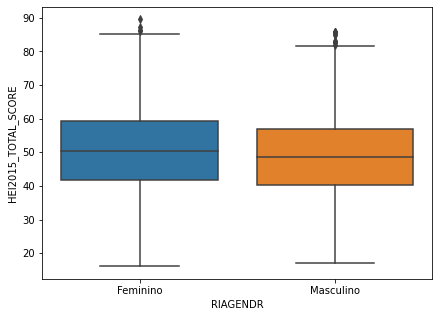

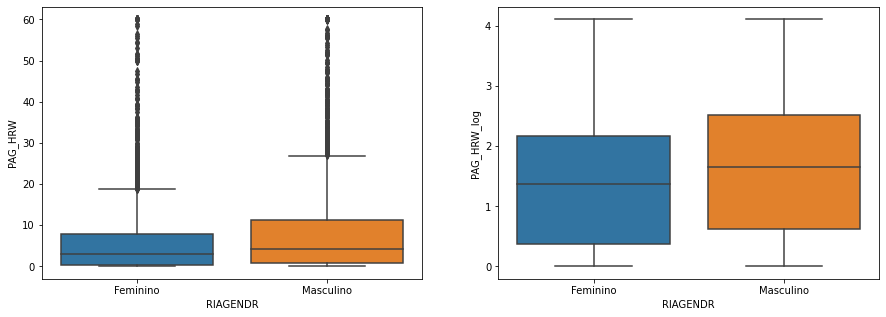

In [61]:
# Hábitos saudáveis x Gênero
plt.figure(figsize=(7,5))
sns.boxplot(x="RIAGENDR", 
            y="HEI2015_TOTAL_SCORE", #Alimentação
            data=bd2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW",  #Tempo de atividade física
            data=bd2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW_log", 
            data=bd2.replace(label_quali),
            ax = ax[1])
plt.show()

In [79]:
from scipy.stats import f_oneway

bd_aux = bd2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))
# Tem diferença entre os dois grupos em relação a alimentação

stat=27.216, p=0.000


In [64]:
from scipy.stats import f_oneway

bd_aux = bd2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                   bd_aux[(bd_aux.RIAGENDR == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))
# Tem diferença entre os dois grupos em relação a tempo de exercício físico

stat=50.329, p=0.000


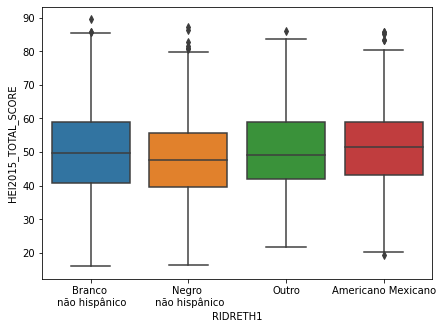

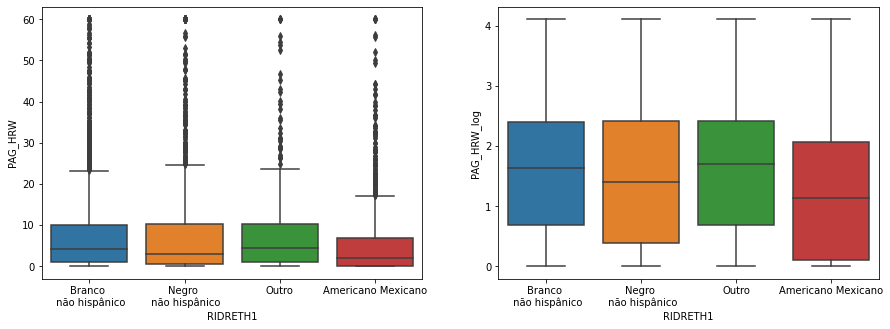

In [65]:
# Hábitos saudáveis e Raça
plt.figure(figsize=(7,5))
sns.boxplot(x="RIDRETH1", 
            y="HEI2015_TOTAL_SCORE", 
            data=bd2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW", 
            data=bd2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW_log", 
            data=bd2.replace(label_quali),
            ax = ax[1])
plt.show()

In [66]:
from scipy.stats import f_oneway

bd_aux = bd2[["RIDRETH1", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(bd_aux[(bd_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.RIDRETH1 == 2)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                   bd_aux[(bd_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))
# Tem diferença entre os grupos em relação a alimentação

stat=11.860, p=0.000


In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(bd_aux['HEI2015_TOTAL_SCORE'],
                  bd_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.964  0.556 -2.8709   0.943  False
     1      3  -1.0955 0.0718 -2.2542  0.0632  False
     1      4  -2.9767  0.001 -4.2992 -1.6541   True
     2      3  -0.1315    0.9 -1.8988  1.6357  False
     2      4  -2.0127 0.0302 -3.8914  -0.134   True
     3      4  -1.8812  0.001 -2.9928 -0.7696   True
----------------------------------------------------


### Aspectos da análise

1. Qual o tipo de estudo está sendo empregado pelo NHANES? Experimental ou observacional?

2. Discuta as possíveis fontes de viés presentes na análise

3. A partir da análise realizada, podemos afirmar que hábitos saudáveis possuem um efeito causal na prevenção de depressão?

4. Quais são as fraquezas das análises realizadas? O que pode ser feito para melhorar?

5. Quais outras variáveis/informações poderiam ter sido coletadas para esta análise?

In [ ]:
# 1. Obervacional, pois analisa os hábitos das pessoas, não 'força' elas a não fazer exercício, se alimentar mal para ver
# os resultados na depressão.

# 2. A remoção dos missing values pode causar viés na análise, mas aqui não foi considerado porque são poucos valores (menos de
# 10%) e alguns eram linhas completas.

# 3. Sim, hábitos saudáveis como praticar exercício físico e ter uma boa alimentação reduzem chance de desenvolver depressão.
# Outras informações que influenciam: renda (quanto menor a renda, mais severos os sintomas de depressão).

# 4. Analisar (comparar) variável por variável. Poderia ser feito regressão múltipla para analisar todas elas de uma vez.

# 5. Sono, tempo de sono e qualidade; tempo de lazer; qualidade dos relacionamentos, aspectos relacionados a trabalho.